In [6]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

In [4]:
all_movies = movies['movieId'].unique()

user_movie_matrix = ratings.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    fill_value=0
)

for movie_id in all_movies:
    if movie_id not in user_movie_matrix.columns:
        user_movie_matrix[movie_id] = 0

user_movie_matrix = user_movie_matrix.reindex(columns=all_movies, fill_value=0)

print(user_movie_matrix)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     0.0     0.0     0.0     0.0     0.0     2.5     0.0   
607         4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
608         2.5     2.0     2.0     0.0     0.0     0.0     0.0     0.0   
609         3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
610         5.0     0.0     0.0     0.0     0.0     5.0     0.0     0.0   

movieId  9       10     

In [7]:
# Определение количества кластеров
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(user_movie_matrix)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(user_movie_matrix, kmeans.labels_))

d:\anaconda\envs\theory_calculating\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\envs\theory_calculating\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\envs\theory_calculating\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\envs\theory_calculating\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

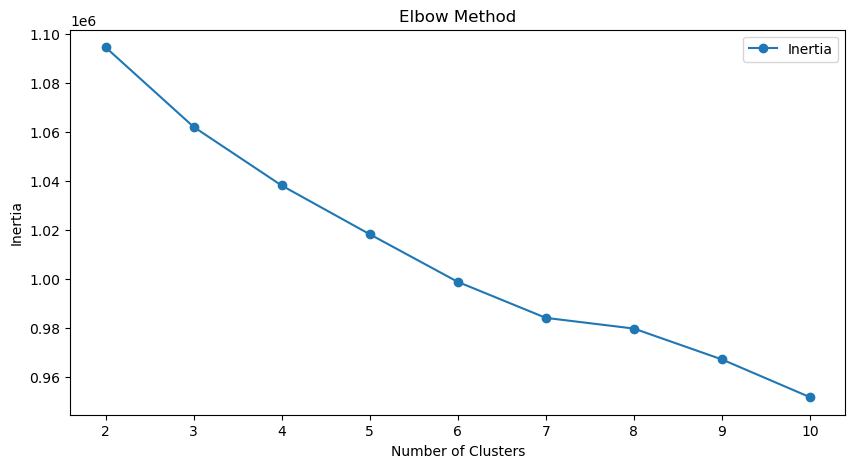

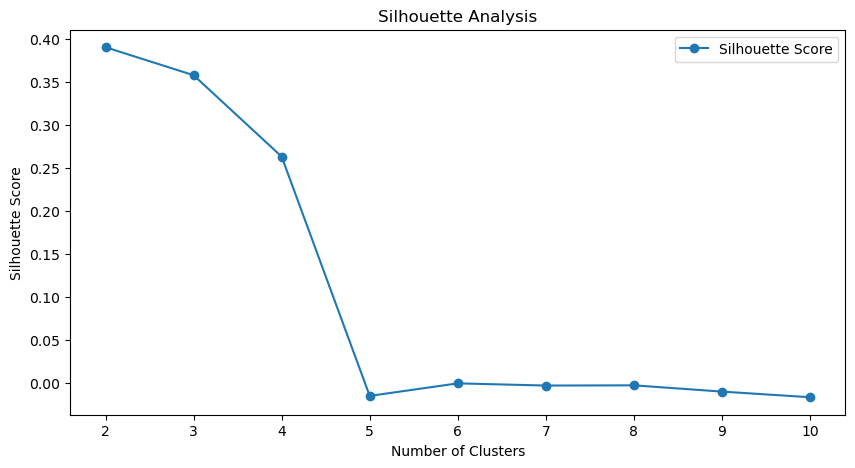

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', label='Inertia')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [10]:
# Выбор оптимального количества кластеров
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(user_movie_matrix)

d:\anaconda\envs\theory_calculating\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [11]:
# Добавляем метки кластеров
user_movie_matrix['cluster'] = kmeans.labels_

In [12]:
print(user_movie_matrix)

movieId    1    2    3    4    5    6    7    8    9   10  ...  193567  \
userId                                                     ...           
1        4.0  0.0  4.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...     0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
5        4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
606      2.5  0.0  0.0  0.0  0.0  0.0  2.5  0.0  0.0  0.0  ...     0.0   
607      4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
608      2.5  2.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  ...     0.0   
609      3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  ...     0.0   
610      5.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...     0.0   

movieId  193571  193573  193579  1935

In [13]:
# Подсчет средних рейтингов в кластерах
cluster_means = (
    ratings.merge(user_movie_matrix[['cluster']], on='userId')
           .groupby(['cluster', 'movieId'])['rating']
           .mean()
           .reset_index()
           .rename(columns={'rating': 'cluster_mean_rating'})
)

print(cluster_means)

       cluster  movieId  cluster_mean_rating
0            0        1             3.864286
1            0        2             3.279070
2            0        3             3.333333
3            0        4             1.500000
4            0        5             2.892857
...        ...      ...                  ...
18607        2   185029             4.500000
18608        2   185435             3.000000
18609        2   187593             4.000000
18610        2   187595             3.750000
18611        2   188301             4.000000

[18612 rows x 3 columns]


In [16]:
def recommend_movies(user_id, n_recommendations=10):
    # кластер пользователя
    user_cluster = user_movie_matrix.loc[user_id, 'cluster']
    
    # фильмы, которые пользователь уже оценил
    rated_movies = ratings[ratings['userId'] == user_id]['movieId'].tolist()
    
    # средние рейтинги фильмов в кластере пользователя
    cluster_movies = cluster_means[cluster_means['cluster'] == user_cluster]
    
    recommendations = cluster_movies[~cluster_movies['movieId'].isin(rated_movies)]
    
    # сортировка по среднему рейтингу и top рекомендаций
    top_recommendations = recommendations.sort_values(by='cluster_mean_rating', ascending=False).head(n_recommendations)
    
    recommended_movie_titles = movies[movies['movieId'].isin(top_recommendations['movieId'])][['movieId', 'title']]
    rated_movie_titles = movies[movies['movieId'].isin(rated_movies)][['movieId', 'title']]
    
    return rated_movie_titles, recommended_movie_titles

In [17]:
user_id = 1 
rated_movies, recommendations = recommend_movies(user_id)

print(f"Фильмы, которые уже оценил пользователь {user_id}:")
print(rated_movies, '\n')

print(f"Рекомендации для пользователя {user_id}:")
print(recommendations)

Фильмы, которые уже оценил пользователь 1:
      movieId                           title
0           1                Toy Story (1995)
2           3         Grumpier Old Men (1995)
5           6                     Heat (1995)
43         47     Seven (a.k.a. Se7en) (1995)
46         50      Usual Suspects, The (1995)
...       ...                             ...
2802     3744                    Shaft (2000)
2836     3793                    X-Men (2000)
2847     3809          What About Bob? (1991)
2991     4006  Transformers: The Movie (1986)
3673     5060    M*A*S*H (a.k.a. MASH) (1970)

[232 rows x 2 columns] 

Рекомендации для пользователя 1:
      movieId                                           title
3164     4256                 Center of the World, The (2001)
7176    72167  Boondock Saints II: All Saints Day, The (2009)
7827    93008                    Very Potter Sequel, A (2010)
8986   138966                Nasu: Summer in Andalusia (2003)
9365   162344               Tom Segu